In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(len(X_train), len(X_test))

60000 10000


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

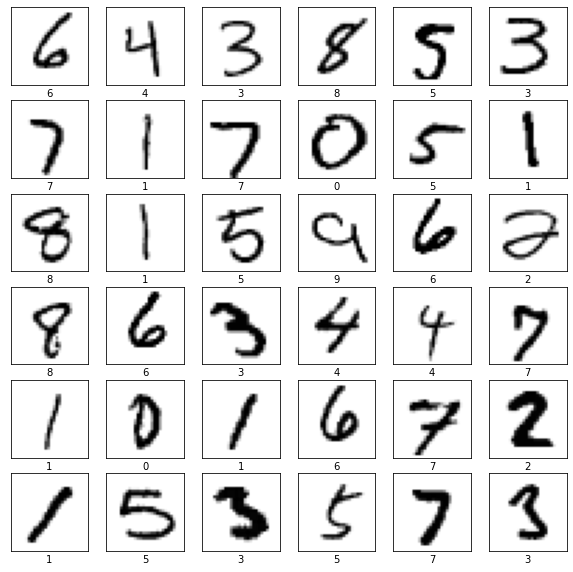

In [4]:
rndsuff = np.random.randint(0, len(X_train)-1, size=len(X_train), dtype='l')

# Show images and labels
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(y_train[rndsuff[i]])
plt.show()

In [5]:
# 총 6만장 2중, 6000장, 1000장
X_valid, X_train = X_train[:1000], X_train[55000:]
y_valid, y_train = y_train[:1000], y_train[55000:]

X_test = X_test[:1000]
y_test = y_test[:1000]

In [6]:
# Your code ...

























# Your code ...

# Your code ...

# Your code ...

In [7]:
# Your code ...

# Your code ...

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 28, 28, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   9248        re_lu[0][0]                      
______________________________________________________________________________________________

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Train on 5000 samples, validate on 1000 samples
Epoch 1/3
5000/5000 [==============================] - 5s 920us/sample - loss: 0.8350 - accuracy: 0.7142 - val_loss: 0.3842 - val_accuracy: 0.9060
Epoch 2/3
5000/5000 [==============================] - 1s 284us/sample - loss: 0.1760 - accuracy: 0.9494 - val_loss: 0.1890 - val_accuracy: 0.9470
Epoch 3/3
5000/5000 [==============================] - 1s 281us/sample - loss: 0.1138 - accuracy: 0.9644 - val_loss: 0.1639 - val_accuracy: 0.9540


In [11]:
_, test_acc = model.evaluate(X_test, y_test)
print('Test acc = ', test_acc)

1000/1000 [==============================] - 0s 147us/sample - loss: 0.1669 - accuracy: 0.9460
Test acc =  0.946


In [13]:
def classifier(predictions) :
    rtn = []    
    for prediction in predictions :
        rtn.append(np.argmax(prediction))                
    return np.array(rtn)

In [14]:
predictions = classifier(model.predict(X_test))

In [16]:
wrong_idx = y_test != predictions
print("전체갯수:"+str(len(predictions)))
print("틀린갯수:"+str(len(predictions[wrong_idx])))

전체갯수:1000
틀린갯수:54


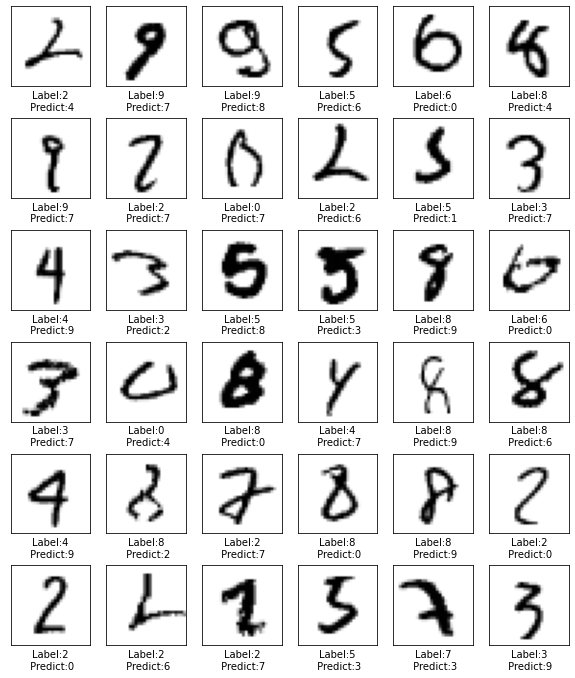

In [17]:
# Show images and labels
plt.figure(figsize=(10,12))
for i in range(36):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[wrong_idx][i], cmap=plt.cm.binary)
    plt.xlabel("Label:" + str(y_test[wrong_idx][i])+"\n Predict:"+str(predictions[wrong_idx][i]))
    #plt.xlabel(y_test[wrong_idx[i]])
plt.show()